In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from array import array

In [2]:
from google.colab import drive
drive.mount('/content/drive')  #/My Drive/Colab Notebooks/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv("/content/drive/My Drive/A_Z Handwritten Data/A_Z Handwritten Data.csv")

In [4]:
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x = data.iloc[:,1:]
y = data.iloc[:,0:1]

In [6]:
print(x.shape)
print(y.shape)

(372450, 784)
(372450, 1)


In [7]:
data.columns = list(range(785))
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
class gaussian_naive:
    
   
    def model_fit(self, X, y,smoothing = 10e-2):
      # n_samples, n_features = X.shape
      self.classes = [ 0 , 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15 ,16, 17, 18, 19, 20, 21, 22, 23, 24, 25]              

      self.mean = np.zeros((26, 784))
      self.var = np.zeros((26, 784))
   
      cnt=np.zeros(26)
      self.priors=np.zeros(26)

      for j in y:
        cnt[j]+=1
        self.priors=cnt/len(y)
      
      for idx in range(len(self.classes)):
        temp = X[y==idx]
        self.mean[idx, :] = temp.mean(axis=0)
        self.var[idx, :] = temp.var(axis=0) + smoothing
  

    
    def predictfun(self, X):
      
      y_pred = []

      for x in X:

        posteriors = []
        for idx in range(len(self.classes)):
          prior = np.log(self.priors[idx])
          pdf = (np.exp(- pow((x-self.mean[idx]),2) / (2 * pow(self.var[idx],2)))) / (np.sqrt(2 * np.pi * pow(self.var[idx],2)) )
          posterior = np.sum(np.log(pdf))
          posterior = prior + posterior
          posteriors.append(posterior)

        y_pred.append(self.classes[np.argmax(posteriors)])


      return np.array(y_pred)     


In [15]:
x


,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
def train_test(data):
    train_per = 0.9
    
     #Shuffling the data 
    data = data.sample(frac=1,random_state=1)
    
    # test set and train set 
    train, test = np.split(data,[int(train_per * len(data))])
    
    #Spliting features and labels
    X_test, Y_test = test.drop(0,axis ='columns'), test[0]
    X_train, Y_train = train.drop(0,axis ='columns'), train[0]

    #Normalisation of test and train data
    X_test = X_test / 255.0 
    X_train = X_train / 255.0

    #Storing train and test data  to ndarray .
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    Y_train = Y_train.to_numpy()
    Y_test = Y_test.to_numpy()

    return X_train,X_test,Y_train,Y_test

  

In [10]:
def confusion_matrix(Y_pred,y_test):
  #Building confusion matrix
  conf_matrix = pd.crosstab(Y_pred,Y_test)
  conf_matrix.to_numpy()

  #labels
  labels =[ chr(i) for i in range(90,90)]
  
  #histogram of confusion matrix using seaborn
  fig, ax = plt.subplots(figsize=(10,10))  
  sns.heatmap(conf_matrix, annot =True,fmt=".0f" ,cmap= 'BuGn',xticklabels=labels,yticklabels=labels)

In [11]:
X_train,X_test,Y_train,Y_test = train_test(data)

Accuracy is 71.6472009665727 %


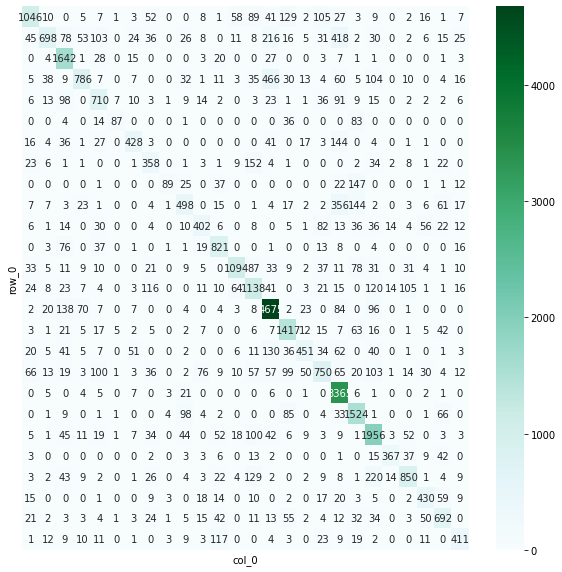

In [12]:
#Data is trained and tested using  Gaussian Naive Bayes model coded from scratch
model = gaussian_naive()
model.model_fit(X_train,Y_train)  #here smoothing constant is default ie : 10e-2
Y_pred = model.predictfun(X_test)
confusion_matrix(Y_pred, Y_test)
print("Accuracy is",(np.sum(Y_test == Y_pred) / len(Y_test))*100, "%")

Predicted character is:  V


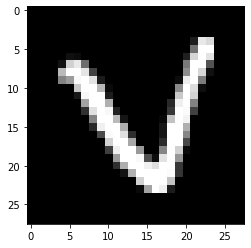

In [16]:
loc = 18119 #{range of loc 0 to 37244}
Y= model.predictfun([X_test[loc]])
pixel = np.array(X_test[loc])

plt.imshow(pixel[0:].reshape((28,28)),cmap ='gray')

print("Predicted character is: ",chr(Y+65))